[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/stefanlessmann/ESMT_IML/blob/main/notebooks/p5_bias_n_variance.ipynb)

# Practical 5: Trees, trees, trees
<hr>

## Preliminaries
load California Housing data set and train/test regression model (as done before)

## Regression trees

lecture right before the practical introduced trees so let's try them out.

### A little bit of sklearn 
first task (easy) is be to train/test a regression tree and compare to the linear regression model 

### Thinking out of the box

given we are in the midst of introducing other algorithms, a key question is when to use which method. So let's look at this question for the two methods we have seen, regression and trees. Empirical comparisons like above are one way to find out what methods works best. But we can do more.

point to make is that trees cannot extrapolate.
#### Exercises
- have students create a count plot (can just use `.hist()`) for the predictions of the tree -> this will show a limited number of distinct predictions.
- have students create a second tree, this time with a pre-defined depth. Must be different than before. let them re-create the plot. They should get that the number of distinct predictions that a tree produces is upper bounded by the maximum depth argument

#### Demo
To stress the point, create synthetic univariate data y = a -bx + noise. Frame this as a price response function to make it look "more applied", hence the negative slope.

train a tree model on that data. next create some more (synthetic) test cases. Make sure the test data comprises a larger range of x (higher and smaller compared to training). Create a plot that shows how the tree will predict the test data badly whenever x is larger than what is seen in training. Can add residuals to the plot so this is very clear. Again, trees cannot extrapolate.

## Theory alert: bias and variance

lecture introduces bias-variance trade-off

reproduce equations for bias variance decomposition of the MSE (see pdf in GDrive)

point of this part is to ensure students understand the meaning of the individual terms. Write code to showcase this. Pretty sure this task can be delegated to ChatGPT



## Exercise NO-GOOD: Variance

In [55]:
def error_variation(model, X, y, error_measure, test_frac=0.3, reps=10):
    '''
    Helper function to repetitively partition incoming data into
    training and test set, training a model on the training set,
    computing predictions for both, the training and the test set, 
    and assessing those predictions given some error function.

    Inputs:     model = instance of a sklearn object 
                X = the feature matrix
                y = the observed outcomes
                error_measure = function to compute predictive accuracy
                test_frac = share of the data used for the test set
                reps = number of repetitions

    Outputs:    Tupel of arrays storing the training and 
                test set error per iteration
    ''' 

    err_tr = []  # empty list to store training set MAE
    err_ts = []  # empty list to store test set MAE
    for i in np.arange(reps):
        if (i % 5==0) and i>0:
            print('Iteration {} of {}'.format(i, r))
        Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_frac)
        model.fit(Xtr, ytr)
        err_tr.append( error_measure(ytr, model.predict(Xtr)) )
        err_ts.append( error_measure(yts, model.predict(Xts)) )

    return (err_tr, err_ts)    

In [75]:
# Let them write this code
r = 25  # number of repetitions
models = [LinearRegression(), MLPRegressor(hidden_layer_sizes=(7,)), DecisionTreeRegressor(max_depth=5)]
#models = [LinearRegression(), DecisionTreeRegressor()]

perf = []
for m in models:
    print('Process: ', m)
    perf.append( error_variation(m, X, y, error_measure=mean_absolute_error, test_frac=test_frac, reps=r) )


Process:  LinearRegression()
Iteration 5 of 25
Iteration 10 of 25
Iteration 15 of 25
Iteration 20 of 25
Process:  MLPRegressor(hidden_layer_sizes=(7,))


C:\Users\stefa\anaconda3\envs\ipml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5 of 25
Iteration 10 of 25
Iteration 15 of 25


C:\Users\stefa\anaconda3\envs\ipml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20 of 25


C:\Users\stefa\anaconda3\envs\ipml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\stefa\anaconda3\envs\ipml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Process:  DecisionTreeRegressor(max_depth=5)
Iteration 5 of 25
Iteration 10 of 25
Iteration 15 of 25
Iteration 20 of 25


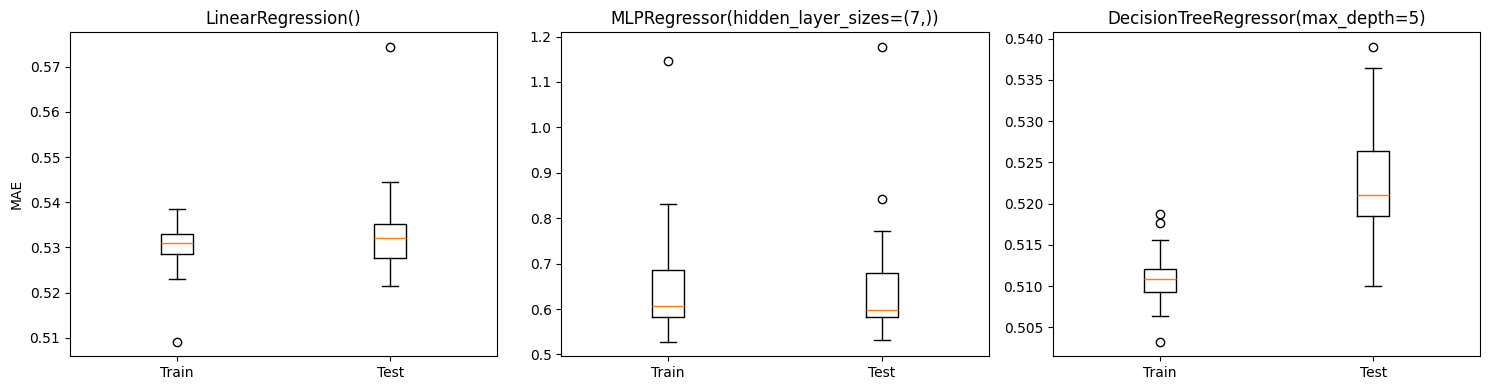

In [80]:
fig, axes = plt.subplots(1, len(models), figsize=(15, 4))  
axes = axes.flatten() # Flatten the axes for easier iteration

axes[0].set_ylabel('MAE')
for i,m in enumerate(models):
    axes[i].boxplot([perf[i][0], perf[i][1]], labels=['Train', 'Test'])
    axes[i].set_title(m)
        

plt.tight_layout() 
plt.show()